In [1]:
import tensorflow as tf
from tensorflow import keras as kr
from keras.datasets import mnist
from keras.utils import np_utils
import seaborn as sns


Using TensorFlow backend.


In [0]:

import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, train_loss, val_loss):
    plt.plot(x, val_loss, 'b', label="Validation Loss")
    plt.plot(x, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape[0])
print(X_train.shape[1])

60000
28


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
batch_size = 128 
nb_epoch = 20
dp_rate=0.3

<h3>MLP + 2 Layers + RELU + ADAM + BN</h3>

In [19]:
model_lay2_tmp=kr.Sequential()
model_lay2_tmp.add(kr.layers.Dense(392,activation='relu',input_shape=(784,)))
model_lay2_tmp.add(kr.layers.Dense(196,activation='relu'))
model_lay2_tmp.add(kr.layers.BatchNormalization())
model_lay2_tmp.add(kr.layers.Dense(10,activation='softmax'))
model_lay2_tmp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_10 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_2 (Batch (None, 196)               784       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1970      
Total params: 387,502
Trainable params: 387,110
Non-trainable params: 392
_________________________________________________________________


In [23]:
model_lay2_tmp.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_lay2_tmp_opt=model_lay2_tmp.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 83us/sample - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0080 - val_acc: 0.9972
Epoch 2/20
42000/42000 [==============================] - 3s 78us/sample - loss: 0.0063 - acc: 0.9978 - val_loss: 0.0101 - val_acc: 0.9969
Epoch 3/20
42000/42000 [==============================] - 3s 76us/sample - loss: 0.0055 - acc: 0.9982 - val_loss: 0.0116 - val_acc: 0.9962
Epoch 4/20
42000/42000 [==============================] - 3s 77us/sample - loss: 0.0030 - acc: 0.9990 - val_loss: 0.0099 - val_acc: 0.9969
Epoch 5/20
42000/42000 [==============================] - 3s 75us/sample - loss: 0.0051 - acc: 0.9982 - val_loss: 0.0210 - val_acc: 0.9933
Epoch 6/20
42000/42000 [==============================] - 3s 76us/sample - loss: 0.0051 - acc: 0.9981 - val_loss: 0.0170 - val_acc: 0.9944
Epoch 7/20
42000/42000 [==============================] - 3s 77us/sample - loss: 0.0049 - acc: 0.9984 - val_loss: 0.

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0864 - acc: 0.9835
Test score: 0.08638339345272927
Test accuracy: 0.9835


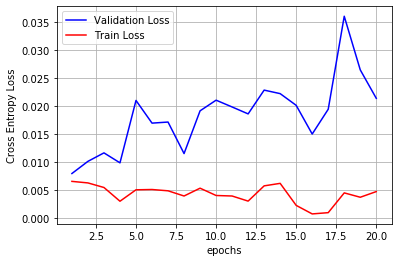

In [24]:
score=model_lay2_tmp.evaluate(X_test,Y_test)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

%matplotlib inline
import matplotlib.pyplot as plt



epochs=[i for i in range(1,nb_epoch+1)]
#plt_dynamic(epochs,model_lay2_opt.history['loss'],model_lay2_opt.history['val_loss'])
plt.plot(epochs, model_lay2_tmp_opt.history['val_loss'], 'b', label="Validation Loss");
plt.plot(epochs, model_lay2_tmp_opt.history['loss'], 'r', label="Train Loss");
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend();
plt.grid();
plt.show();

<h3>MLP with Two Hidden Layers + ADAM + RELU + DROPOUT + BN</h3>

In [25]:
model_lay2=kr.Sequential()
model_lay2.add(kr.layers.Dense(392,activation='relu',input_shape=(784,)))
model_lay2.add(kr.layers.Dropout(dp_rate))
model_lay2.add(kr.layers.Dense(196,activation='relu'))
model_lay2.add(kr.layers.BatchNormalization())
model_lay2.add(kr.layers.Dense(10,activation='softmax'))
model_lay2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_3 (Batch (None, 196)               784       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1970      
Total params: 387,502
Trainable params: 387,110
Non-trainable params: 392
_________________________________________________________________


In [0]:
model_lay2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'],)


In [27]:
model_lay2_opt=model_lay2.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 95us/sample - loss: 0.3063 - acc: 0.9056 - val_loss: 0.1517 - val_acc: 0.9563
Epoch 2/20
42000/42000 [==============================] - 4s 85us/sample - loss: 0.1339 - acc: 0.9592 - val_loss: 0.1113 - val_acc: 0.9655
Epoch 3/20
42000/42000 [==============================] - 4s 84us/sample - loss: 0.0980 - acc: 0.9696 - val_loss: 0.0989 - val_acc: 0.9708
Epoch 4/20
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0804 - acc: 0.9746 - val_loss: 0.0955 - val_acc: 0.9724
Epoch 5/20
42000/42000 [==============================] - 4s 84us/sample - loss: 0.0649 - acc: 0.9792 - val_loss: 0.0953 - val_acc: 0.9721
Epoch 6/20
42000/42000 [==============================] - 4s 84us/sample - loss: 0.0573 - acc: 0.9815 - val_loss: 0.0886 - val_acc: 0.9766
Epoch 7/20
42000/42000 [==============================] - 4s 85us/sample - loss: 0.0493 - acc: 0.9839 - val_loss: 0.

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0672 - acc: 0.9817
Test score: 0.06723583921844693
Test accuracy: 0.9817


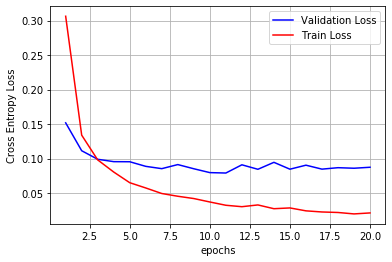

In [28]:
score=model_lay2.evaluate(X_test,Y_test)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

%matplotlib inline
import matplotlib.pyplot as plt



epochs=[i for i in range(1,nb_epoch+1)]
#plt_dynamic(epochs,model_lay2_opt.history['loss'],model_lay2_opt.history['val_loss'])
plt.plot(epochs, model_lay2_opt.history['val_loss'], 'b', label="Validation Loss");
plt.plot(epochs, model_lay2_opt.history['loss'], 'r', label="Train Loss");
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend();
plt.grid();
plt.show();

<h3>MLP 2 hidden layers + ADAM + RELU + DROPOUT + BN</h3>

In [29]:
model_lay3=kr.Sequential()
model_lay3.add(kr.layers.Dense(500,activation='relu',input_shape=(784,)))
model_lay3.add(kr.layers.Dropout(dp_rate))
model_lay3.add(kr.layers.Dense(300,activation='relu'))
model_lay3.add(kr.layers.Dense(100,activation='relu'))
model_lay3.add(kr.layers.BatchNormalization())
model_lay3.add(kr.layers.Dense(10,activation='softmax'))
model_lay3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 574,310
Trainable params: 574,110
Non-trainable params: 200
______________________________________________

In [30]:
model_lay3.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_lay3_opt=model_lay3.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 134us/sample - loss: 0.2965 - acc: 0.9116 - val_loss: 0.1503 - val_acc: 0.9544
Epoch 2/20
42000/42000 [==============================] - 5s 127us/sample - loss: 0.1291 - acc: 0.9606 - val_loss: 0.1178 - val_acc: 0.9639
Epoch 3/20
42000/42000 [==============================] - 5s 126us/sample - loss: 0.0959 - acc: 0.9710 - val_loss: 0.0974 - val_acc: 0.9706
Epoch 4/20
42000/42000 [==============================] - 5s 126us/sample - loss: 0.0779 - acc: 0.9756 - val_loss: 0.1015 - val_acc: 0.9712
Epoch 5/20
42000/42000 [==============================] - 5s 123us/sample - loss: 0.0640 - acc: 0.9794 - val_loss: 0.0906 - val_acc: 0.9742
Epoch 6/20
42000/42000 [==============================] - 5s 121us/sample - loss: 0.0504 - acc: 0.9836 - val_loss: 0.0928 - val_acc: 0.9725
Epoch 7/20
42000/42000 [==============================] - 5s 119us/sample - loss: 0.0470 - acc: 0.9846 - val_l

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0603 - acc: 0.9832
Test score: 0.06033954610183318
Test accuracy: 0.9832


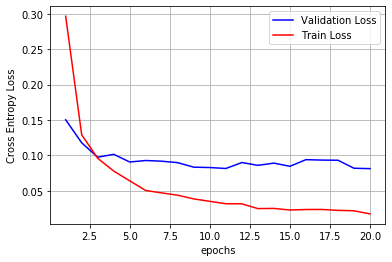

In [31]:
score=model_lay3.evaluate(X_test,Y_test)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

%matplotlib inline
import matplotlib.pyplot as plt



epochs=[i for i in range(1,nb_epoch+1)]
#plt_dynamic(epochs,model_lay2_opt.history['loss'],model_lay2_opt.history['val_loss'])
plt.plot(epochs, model_lay3_opt.history['val_loss'], 'b', label="Validation Loss");
plt.plot(epochs, model_lay3_opt.history['loss'], 'r', label="Train Loss");
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend();
plt.grid();
plt.show();

<h3>MLP + 5 Hiddem Layers + RELU + ADAM + BN + DROPOUT</h3>

In [32]:
model_lay5=kr.Sequential()
model_lay5.add(kr.layers.Dense(600,activation='relu',input_shape=(784,)))
model_lay5.add(kr.layers.Dropout(dp_rate))
model_lay5.add(kr.layers.Dense(450,activation='relu'))
model_lay5.add(kr.layers.Dense(300,activation='relu'))
model_lay5.add(kr.layers.Dense(150,activation='relu'))
model_lay5.add(kr.layers.BatchNormalization())
model_lay5.add(kr.layers.Dense(10,activation='softmax'))
model_lay5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 600)               471000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 450)               270450    
_________________________________________________________________
dense_21 (Dense)             (None, 300)               135300    
_________________________________________________________________
dense_22 (Dense)             (None, 150)               45150     
_________________________________________________________________
batch_normalization_5 (Batch (None, 150)               600       
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [33]:
model_lay5.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_lay5_opt=model_lay5.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size,verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 196us/sample - loss: 0.2814 - acc: 0.9145 - val_loss: 0.1736 - val_acc: 0.9468
Epoch 2/20
42000/42000 [==============================] - 8s 187us/sample - loss: 0.1318 - acc: 0.9595 - val_loss: 0.1302 - val_acc: 0.9616
Epoch 3/20
42000/42000 [==============================] - 8s 188us/sample - loss: 0.0937 - acc: 0.9707 - val_loss: 0.1305 - val_acc: 0.9621
Epoch 4/20
42000/42000 [==============================] - 8s 183us/sample - loss: 0.0764 - acc: 0.9760 - val_loss: 0.0917 - val_acc: 0.9732
Epoch 5/20
42000/42000 [==============================] - 8s 184us/sample - loss: 0.0675 - acc: 0.9788 - val_loss: 0.1090 - val_acc: 0.9699
Epoch 6/20
42000/42000 [==============================] - 8s 183us/sample - loss: 0.0588 - acc: 0.9806 - val_loss: 0.1069 - val_acc: 0.9720
Epoch 7/20
42000/42000 [==============================] - 8s 181us/sample - loss: 0.0496 - acc: 0.9841 - val_l

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0694 - acc: 0.9833
Test score: 0.06941232110494239
Test accuracy: 0.9833


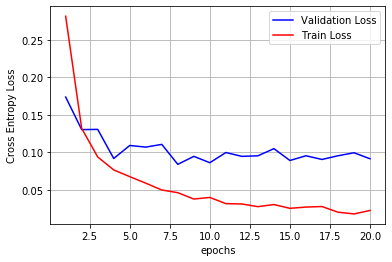

In [34]:
score=model_lay5.evaluate(X_test,Y_test)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

%matplotlib inline
import matplotlib.pyplot as plt



epochs=[i for i in range(1,nb_epoch+1)]
#plt_dynamic(epochs,model_lay2_opt.history['loss'],model_lay2_opt.history['val_loss'])
plt.plot(epochs, model_lay5_opt.history['val_loss'], 'b', label="Validation Loss");
plt.plot(epochs, model_lay5_opt.history['loss'], 'r', label="Train Loss");
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend();
plt.grid();
plt.show();